In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install collections

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.tag import pos_tag, pos_tag_sents
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import spacy
nlp = spacy.load('en_core_web_sm')
from collections import Counter
import pandas as pd
import numpy as np
from functools import reduce
# import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# NO PUNCTUATION

# my_file = pd.read_csv("/content/drive/MyDrive/NLP Group Project/Texts/all_without_punctuation.csv")
my_file = pd.read_csv("/content/drive/MyDrive/NLP Group Project/Texts/no_punc_data_all.csv")
text = my_file.applymap(str)
# text_gen = my_file_gen.applymap(str)
# my_file = my_file.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

ctrl_df = text[text['alg'] == 'Ctrl']
gpt_df = text[text['alg'] == 'GPT']
gpt2_df = text[text['alg'] == 'gpt2']
grover_df = text[text['alg'] == 'Grover']
xlm_df = text[text['alg'] == 'xlm']
xlnet_df = text[text['alg'] == 'xlnet']
pplm_df = text[text['alg'] == 'pplm']
human_df = text[text['alg'] == 'human']
fair_df = text[text['alg'] == 'fair']
instructgpt_df = text[text['alg'] == 'instructgpt']
gpt3_df = text[text['alg'] == 'gpt3']

In [6]:
# INCLUDES PUNCTUATION
# Added this to make counting sentences easier

my_file = pd.read_csv("/content/drive/MyDrive/NLP Group Project/Texts/punc_data_all.csv")
text_punkt = my_file.applymap(str)

ctrl_df_punc = text_punkt[text_punkt['alg'] == 'Ctrl']
gpt_df_punc = text_punkt[text_punkt['alg'] == 'GPT']
gpt2_df_punc = text_punkt[text_punkt['alg'] == 'gpt2']
grover_df_punc = text_punkt[text_punkt['alg'] == 'Grover']
xlm_df_punc = text_punkt[text_punkt['alg'] == 'xlm']
xlnet_df_punc = text_punkt[text_punkt['alg'] == 'xlnet']
pplm_df_punc = text_punkt[text_punkt['alg'] == 'pplm']
human_df_punc = text_punkt[text_punkt['alg'] == 'human']
fair_df_punc = text_punkt[text_punkt['alg'] == 'fair']
gpt3_df_punc = text_punkt[text_punkt['alg'] == 'gpt3']
instructgpt_df_punc = text_punkt[text_punkt['alg'] == 'instructgpt']

# Most common words

In [7]:
# Be aware of how the text is tokenized, especially without punctuation ('s', 'nt', etc.)

def most_common_aa(df):
  stop_words = set(stopwords.words('english'))
  digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  df['generation'] = df['generation'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words) and word[0] not in digits]))
  mc_words = Counter(" ".join(ctrl_df['generation']).split()).most_common(25)
  return mc_words


def most_common_gen(df):
  stop_words = set(stopwords.words('english'))
  digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  df['generation'] = df['generation'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words) and word[0] not in digits]))
  mc_words = Counter(" ".join(df['generation']).split()).most_common(25)
  return mc_words


ctrl_mc = most_common_aa(ctrl_df)
grover_mc = most_common_aa(grover_df)
gpt_mc = most_common_aa(gpt_df)
gpt2_mc = most_common_aa(gpt2_df)
xlm_mc = most_common_aa(xlm_df)
xlnet_mc = most_common_aa(xlnet_df)
pplm_mc = most_common_aa(pplm_df)
human_mc = most_common_aa(human_df)
fair_mc = most_common_aa(fair_df)
instructgpt_mc = most_common_gen(instructgpt_df)
gpt3_mc = most_common_gen(gpt3_df)

<ipython-input-7-59078d519c34>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['generation'] = df['generation'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words) and word[0] not in digits]))
<ipython-input-7-59078d519c34>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['generation'] = df['generation'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words) and word[0] not in digits]))


#Average words, sentences

In [8]:
def avg_word_per_sent(df):
 word_n = df['generation'].apply(lambda n: len(n.split()))
 avg = round(sum(word_n)/len(df),2)
 return avg

#Make sure to use the punc dataframes for sentence boundaries
def avg_sents(df):
  df['sentence count'] = df['generation'].apply(sent_tokenize).tolist()
  df['sentence count'] = df['sentence count'].apply(len)
  avg = df['sentence count'].mean()
  return avg

In [9]:
#Avg words

ctrl_w = avg_word_per_sent(ctrl_df)
human_w = avg_word_per_sent(human_df)
pplm_w = avg_word_per_sent(pplm_df)
xlm_w = avg_word_per_sent(xlm_df)
xlnet_w = avg_word_per_sent(xlnet_df)
fair_w = avg_word_per_sent(fair_df)
gpt_w = avg_word_per_sent(gpt_df)
gpt2_w = avg_word_per_sent(gpt2_df)    
gpt3_w = avg_word_per_sent(gpt3_df)
instructgpt_w = avg_word_per_sent(instructgpt_df)
grover_w = avg_word_per_sent(grover_df)

print(f'CTRL: {ctrl_w}')
print(f'FAIR: {fair_w}')
print(f'Human: {human_w}')
print(f'PPLM: {pplm_w}')
print(f'XLM: {xlm_w}')
print(f'XLNET: {xlnet_w}')
print(f'GPT: {gpt_w}')
print(f'GPT-2: {gpt2_w}')
print(f'GPT-3: {gpt3_w}')
print(f'InstructGPT: {instructgpt_w}')
print(f'GROVER: {grover_w}')

CTRL: 301.68
FAIR: 204.53
Human: 515.65
PPLM: 248.09
XLM: 320.6
XLNET: 331.82
GPT: 197.77
GPT-2: 199.29
GPT-3: 79.31
InstructGPT: 75.19
GROVER: 259.9


In [10]:
#Avg sentences

ctrl_s = avg_sents(ctrl_df_punc)
human_s = avg_sents(human_df_punc)
fair_s = avg_sents(fair_df_punc)
pplm_s = avg_sents(pplm_df_punc)
xlm_s = avg_sents(xlm_df_punc)
xlnet_s = avg_sents(xlnet_df_punc)
gpt_s = avg_sents(gpt_df_punc)
gpt2_s = avg_sents(gpt2_df_punc)
gpt3_s = avg_sents(gpt3_df_punc)
instructgpt_s = avg_sents(instructgpt_df_punc)
grover_s = avg_sents(grover_df_punc)

print(f'CTRL: {ctrl_s}')
print(f'FAIR: {fair_s}')
print(f'Human: {human_s}')
print(f'PPLM: {pplm_s}')
print(f'XLM: {xlm_s}')
print(f'XLNET: {xlnet_s}')
print(f'GPT: {gpt_s}')
print(f'GPT-2: {gpt2_s}')
print(f'GPT-3: {gpt3_s}')
print(f'InstructGPT: {instructgpt_s}')
print(f'GROVER: {grover_s}')

<ipython-input-8-3d7558486cbe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence count'] = df['generation'].apply(sent_tokenize).tolist()
<ipython-input-8-3d7558486cbe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence count'] = df['sentence count'].apply(len)
<ipython-input-8-3d7558486cbe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

CTRL: 34.30393996247655
FAIR: 20.26923076923077
Human: 43.60506566604128
PPLM: 15.117260787992496
XLM: 3.969043151969981
XLNET: 4.011257035647279
GPT: 33.45403377110694
GPT-2: 10.146341463414634
GPT-3: 8.076923076923077
InstructGPT: 7.553433144037171
GROVER: 11.295497185741088


<ipython-input-8-3d7558486cbe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence count'] = df['generation'].apply(sent_tokenize).tolist()
<ipython-input-8-3d7558486cbe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence count'] = df['sentence count'].apply(len)


# POS tagging

In [11]:
ctrl_df["pos_sequence"] = ctrl_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])
fair_df["pos_sequence"] = fair_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])
human_df["pos_sequence"] = human_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])
xlm_df["pos_sequence"] = xlm_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])
xlnet_df["pos_sequence"] = xlnet_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])
gpt_df["pos_sequence"] = gpt_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])
gpt2_df["pos_sequence"] = gpt2_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])
gpt3_df["pos_sequence"] = gpt3_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])
instructgpt_df["pos_sequence"] = instructgpt_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])
pplm_df["pos_sequence"] = pplm_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])
grover_df["pos_sequence"] = grover_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])


<ipython-input-11-c9e679af5239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_df["pos_sequence"] = ctrl_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])
<ipython-input-11-c9e679af5239>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fair_df["pos_sequence"] = fair_df["generation"].apply(lambda x: [t.pos_ for t in nlp(x)])
<ipython-input-11-c9e679af5239>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [12]:
#PPLM

pplm_pos_df = pplm_df.explode('pos_sequence')
pplm_pos_counts = pplm_pos_df['pos_sequence'].value_counts()

#GROVER

grover_pos_df = grover_df.explode('pos_sequence')
grover_pos_counts = grover_pos_df['pos_sequence'].value_counts()

#GPT

gpt_pos_df = gpt_df.explode('pos_sequence')
gpt_pos_counts = gpt_pos_df['pos_sequence'].value_counts()

#GPT2

gpt2_pos_df = gpt2_df.explode('pos_sequence')
gpt2_pos_counts = gpt2_pos_df['pos_sequence'].value_counts()


#GPT3

gpt3_pos_df = gpt3_df.explode('pos_sequence')
gpt3_pos_counts = gpt3_pos_df['pos_sequence'].value_counts()

#InstructGPT

instructgpt_pos_df = instructgpt_df.explode('pos_sequence')
instructgpt_pos_counts = instructgpt_pos_df['pos_sequence'].value_counts()

#Human

human_pos_df = human_df.explode('pos_sequence')
human_pos_counts = human_pos_df['pos_sequence'].value_counts()

#CTRL

ctrl_pos_df = ctrl_df.explode('pos_sequence')
ctrl_pos_counts = ctrl_pos_df['pos_sequence'].value_counts()

#FAIR

fair_pos_df = fair_df.explode('pos_sequence')
fair_pos_counts = fair_pos_df['pos_sequence'].value_counts()

#XLM

xlm_pos_df = xlm_df.explode('pos_sequence')
xlm_pos_counts = xlm_pos_df['pos_sequence'].value_counts()

#XLNET

xlnet_pos_df = xlnet_df.explode('pos_sequence')
xlnet_pos_counts = xlnet_pos_df['pos_sequence'].value_counts()


In [56]:
pos_dict = {'Human': human_pos_counts, 'FAIR': fair_pos_counts, 'GROVER': grover_pos_counts, 'PPLM': pplm_pos_counts, 'GPT': gpt_pos_counts, 'GPT-3': gpt3_pos_counts, 'InstructGPT': instructgpt_pos_counts, 'XLNET': xlnet_pos_counts}

new = pd.DataFrame(pos_dict)

In [57]:
new = new.iloc[0:5]

new

,Human,FAIR,GROVER,PPLM,GPT,GPT-3,InstructGPT,XLNET
ADJ,61679,24857,33450,30183,19777.0,21488,18544,32431
ADP,9754,1652,3826,1361,5766.0,2230,2246,19706
ADV,26065,7806,12363,6243,23123.0,8672,6497,59362
AUX,11277,4012,6061,3713,8990.0,3765,3324,9622
CCONJ,3536,78,1458,46,217.0,284,270,4016


<Axes: title={'center': 'PoS Tags Subset'}>

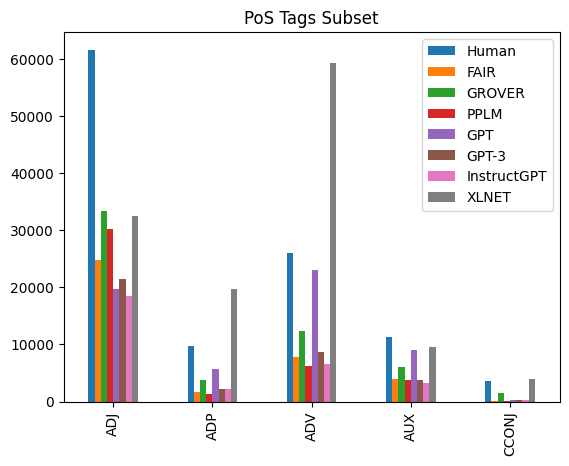

In [58]:
new.plot(kind='bar', title='PoS Tags Subset')

<Axes: title={'center': 'PPLM POS Tag Counts'}>

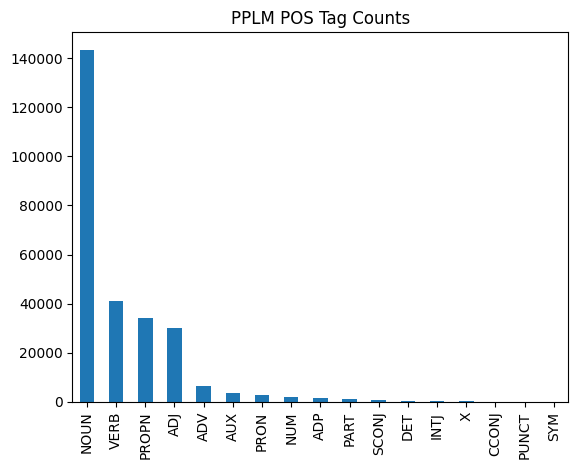

In [ ]:
pplm_pos_counts.plot(kind='bar', title='PPLM POS Tag Counts')

<Axes: title={'center': 'Human POS Tag Counts'}>

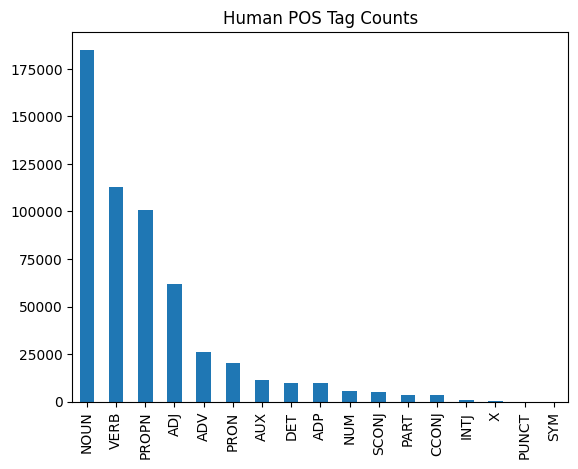

In [ ]:
human_pos_counts.plot(kind='bar', title='Human POS Tag Counts')

<Axes: title={'center': 'GPT-3 POS Tag Counts'}>

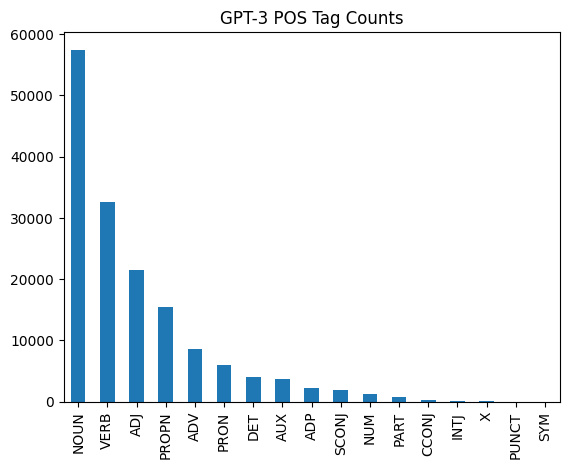

In [ ]:
gpt3_pos_counts.plot(kind='bar', title='GPT-3 POS Tag Counts')

In [ ]:
# def get_tags(df):
#   counts_dict = {}
#   for line in df['generation']:
#     counts_list = []
#     lower_case = line.lower()
#     no_punc = ''.join(filter(lambda x: x.isalpha() or x.isdigit() or x.isspace(), lower_case))
#     tokens = nltk.word_tokenize(line)
#     tags = nltk.pos_tag(tokens)
#     counts = Counter(tag for word, tag in tags)   
#     counts_dict[tag] = counts
#   return counts_dict

# def get_tags(df):
#   texts = df['generation'].tolist()
#   map(word_tokenize, texts)
#   tags = pos_tag_sents(df['generation'].apply(word_tokenize))
#   df['POS'] = pos_tag_sents(df['generation'].apply(word_tokenize))
#   return df

In [ ]:
# ctrl_tags = get_tags(ctrl_df)
# gpt_tags = get_tags(gpt_df)
# gpt2_tags = get_tags(gpt2_df)
# xlm_tags = get_tags(xlm_df)
# xlnet_tags = get_tags(xlnet_df)
# pplm_tags = get_tags(pplm_df)
# human_tags = get_tags(human_df)
# fair_tags = get_tags(fair_df)
# gpt3_tags = get_tags(gpt3_df)
# instructgpt_tags = get_tags(instructgpt_df)

In [ ]:
new_ctrl = pd.DataFrame.from_dict(ctrl, orient='index', columns = ['ctrl'])
new_ctrl = new_ctrl.reset_index()
new_ctrl = new_ctrl.rename(columns={'index': 'pos'})

new_gpt = pd.DataFrame.from_dict(gpt, orient='index', columns = ['gpt'])
new_gpt = new_gpt.reset_index()
new_gpt = new_gpt.rename(columns={'index': 'pos'})

new_gpt2 = pd.DataFrame.from_dict(gpt2, orient='index', columns = ['gpt2'])
new_gpt2 = new_gpt2.reset_index()
new_gpt2 = new_gpt2.rename(columns={'index': 'pos'})

new_xlm = pd.DataFrame.from_dict(xlm, orient='index', columns = ['xlm'])
new_xlm = new_xlm.reset_index()
new_xlm = new_xlm.rename(columns={'index': 'pos'})

new_xlnet = pd.DataFrame.from_dict(xlnet, orient='index', columns = ['xlnet'])
new_xlnet = new_xlnet.reset_index()
new_xlnet = new_xlnet.rename(columns={'index': 'pos'})

new_pplm = pd.DataFrame.from_dict(pplm, orient='index', columns = ['pplm'])
new_pplm = new_pplm.reset_index()
new_pplm = new_pplm.rename(columns={'index': 'pos'})

new_human = pd.DataFrame.from_dict(human, orient='index', columns = ['human'])
new_human = new_human.reset_index()
new_human = new_human.rename(columns={'index': 'pos'})

new_fair = pd.DataFrame.from_dict(fair, orient='index', columns = ['fair'])
new_fair = new_fair.reset_index()
new_fair = new_fair.rename(columns={'index': 'pos'})

In [ ]:
frames = [new_ctrl, new_gpt, new_gpt2, new_xlm, new_xlnet, new_pplm, new_human, new_fair]
merged = reduce(lambda left, right: pd.merge(left,right, on=['pos'], how='left'), frames)
merged = merged.sort_values('pos')
merged = merged.fillna(0)

In [ ]:
merged['gpt'] = merged['gpt'].apply(np.int64)
merged['gpt2'] = merged['gpt2'].apply(np.int64)
merged['xlm'] = merged['xlm'].apply(np.int64)
merged['pplm'] = merged['pplm'].apply(np.int64)
merged['fair'] = merged['fair'].apply(np.int64)
merged['xlnet'] = merged['xlnet'].apply(np.int64)
merged['human'] = merged['human'].apply(np.int64)

In [ ]:
merged

# Empath (similar to LiWC)

In [ ]:
# !pip install empath

In [ ]:
# from empath import Empath
# lexicon = Empath()

In [ ]:
# def empath_analyses(df):
#   analyses = []
#   for line in df['text']:
#     analyses.append(lexicon.analyze(line, normalize=True))
#   return analyses

In [ ]:
# ctrl_em = empath_analyses(ctrl_df)
# gpt_em = empath_analyses(gpt_df)
# gpt2_em = empath_analyses(gpt2_df)
# xlm_em = empath_analyses(xlm_df)
# xlnet_em = empath_analyses(xlnet_df)
# pplm_em = empath_analyses(pplm_df)
# human_em = empath_analyses(human_df)
# fair_em = empath_analyses(fair_df)